In [1]:
from matplotlib import pyplot as plt
import numpy as np

from sigproc_kit import *

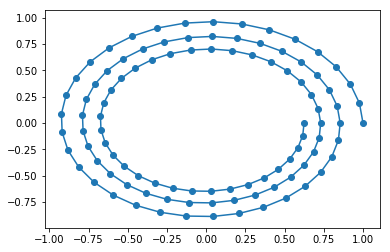

In [2]:
t = np.linspace(0, 3*2*np.pi, 100)
tau = 40
x = np.cos(t) * np.exp(-t/tau)
y = np.sin(t) * np.exp(-t/tau)

plt.scatter(x,y)
plt.plot(x,y)

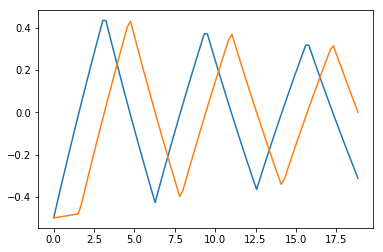

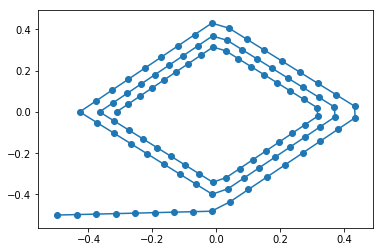

In [3]:
steepness=np.pi*1
width=np.pi
p = t*0
q = t*0
for i in range(10):
    p += square_pulse(t,leading_edge=steepness,trailing_edge=steepness,width=width,delay=i*2*np.pi)
    q += square_pulse(t,leading_edge=steepness,trailing_edge=steepness,width=width,delay=i*2*np.pi+np.pi/2)

p = (p-0.5)*np.exp(-t/tau)
q = (q-0.5)*np.exp(-t/tau)
plt.plot(t,p)
plt.plot(t,q)

plt.show()

plt.scatter(p,q)
plt.plot(p,q)

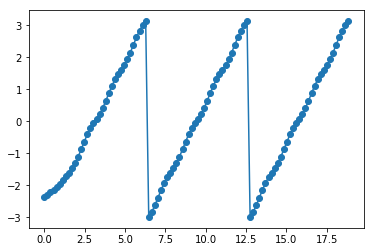

In [4]:
plt.scatter(t,np.arctan2(q,p))
plt.plot(t,np.arctan2(q,p))

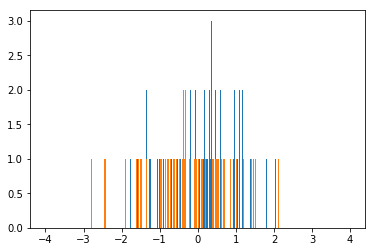

In [105]:
gauss1_samples = np.random.randn(128)
gauss2_samples = np.random.randn(128)

mybins=np.arange(-4,4,0.01)
hist1 = plt.hist(gauss1_samples, bins=mybins)
hist2 = plt.hist(gauss2_samples, bins=mybins)
x = hist1[1]
gauss1 = hist1[0]
gauss2 = hist2[0]

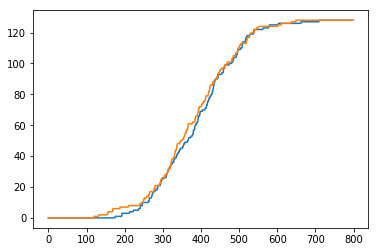

In [106]:
plt.plot(np.cumsum(gauss1))
plt.plot(np.cumsum(gauss2))

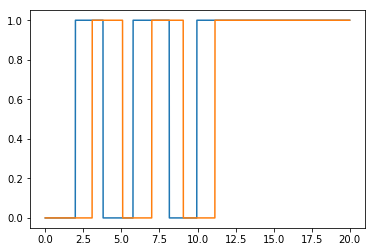

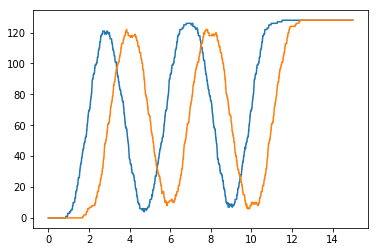

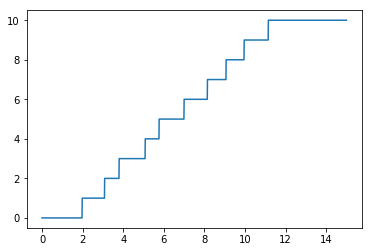

In [119]:
xscale=2

x = np.arange(0,20,10e-3/xscale)
y1 = np.zeros(len(x))
y2 = np.zeros(len(x))
y3 = np.zeros(len(x))


fuzzx = 15*xscale


sign1 = 1;
sign2 = 1;

for i in range(10):
    pos =  int(200*xscale + 100*xscale*i + np.random.randn()*fuzzx)
    if i % 2 == 0:
        y1[pos] += sign1
        sign1 *= -1
    else:
        y2[pos] += sign2
        sign2 *= -1
    y3[pos] += 1
        
    
xor1 = np.cumsum(y1)
xor2 = np.cumsum(y2)
coarse = np.cumsum(y3)

plt.plot(x,xor1)
plt.plot(x,xor2)

plt.show()

chain1 = np.convolve(xor1,gauss1,mode="same")
chain2 = np.convolve(xor2,gauss2,mode="same")

# crop it

mask = (x<15)

x = x[mask]
chain1 = chain1[mask]
chain2 = chain2[mask]
coarse = coarse[mask]

plt.plot(x,chain1)
plt.plot(x,chain2)
plt.show()
plt.plot(x,coarse)




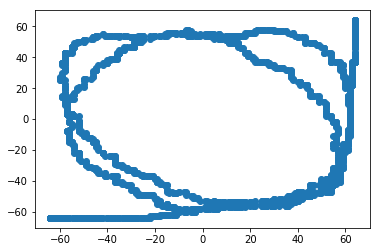

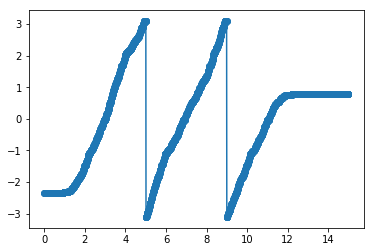

In [122]:
I = chain1-64
Q = chain2-64

plt.scatter(I,Q)
plt.show()

phi = np.arctan2(Q,I)

plt.scatter(x,phi)
plt.plot(x,phi)

[]

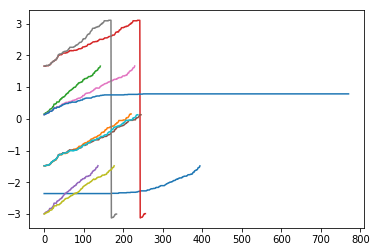

In [123]:
for i in range(11):
    mask = (coarse == i)
    phiset=phi[mask]
    plt.plot(phiset)
    
plt.plot()